In [41]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Confusion Matrix Library
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.shape

(768, 9)

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

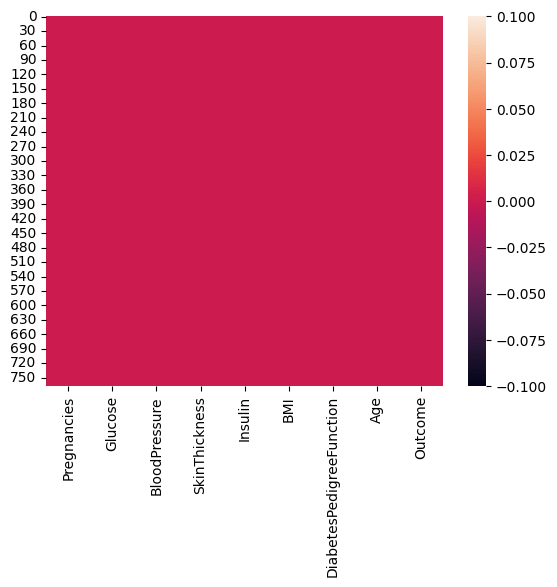

In [9]:
sns.heatmap(data.isnull())

No Null Values Spotted

In [10]:
data.duplicated().sum()

0

No Duplicated Values Spotter

In [11]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

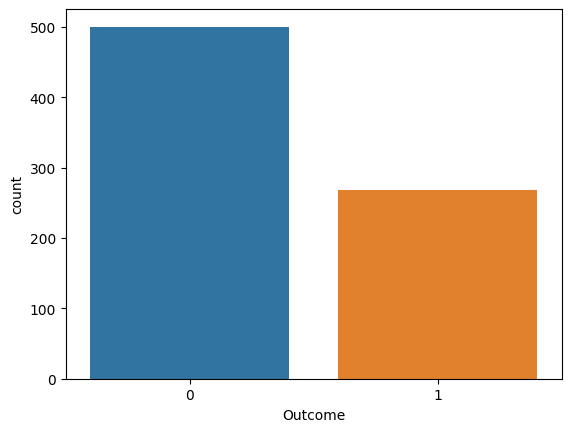

In [12]:
sns.countplot(x='Outcome',data=data)
plt.show()

Now We will Convert the Values which are 0 in the columns to Nan (Null Values)

In [13]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose',
                                                                                    'BloodPressure',
                                                                                    'SkinThickness',
                                                                                    'Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Check Null Values

In [14]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

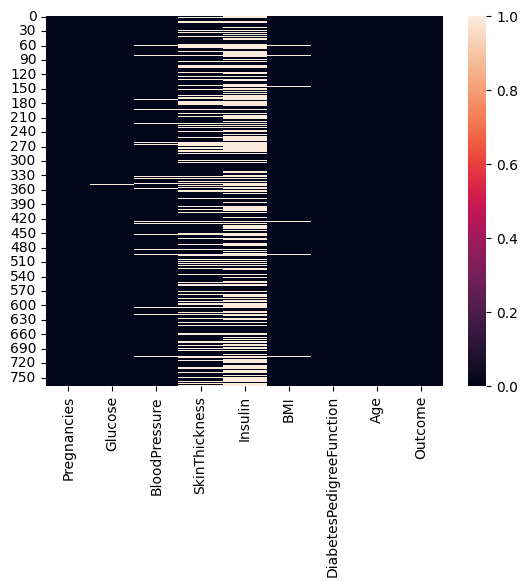

In [15]:
sns.heatmap(data_copy.isnull())

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

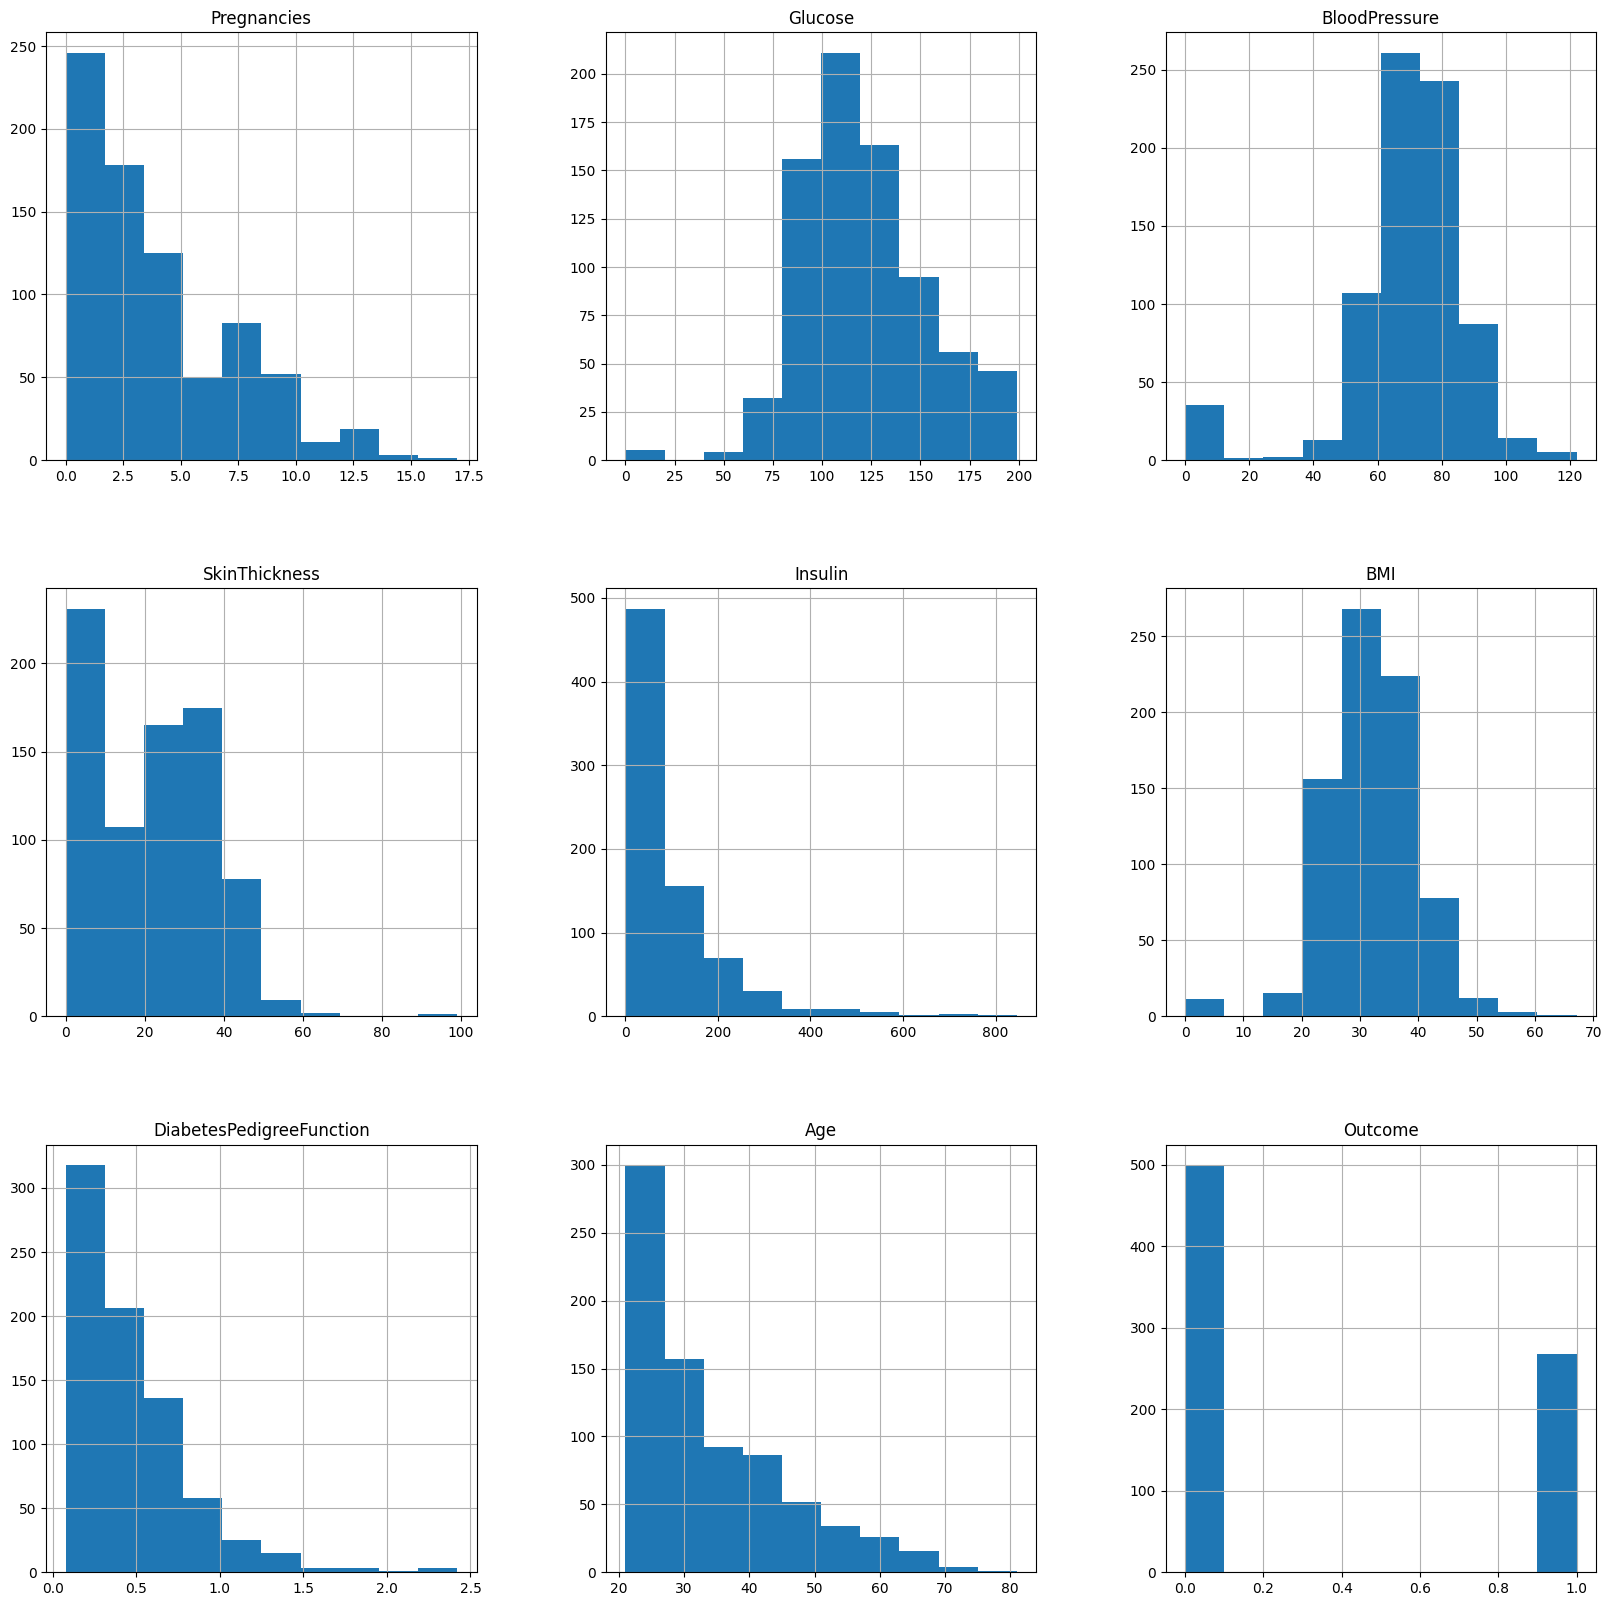

In [16]:
data.hist(figsize = (20,20))

In [17]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
data_copy['Glucose'].fillna(method='ffill',inplace =True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace =True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].mean(),inplace =True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace =True)
data_copy['BMI'].fillna(method='bfill',inplace =True)

In [19]:
data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

All the Null Values which we added in the place of "0" are now Filled.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

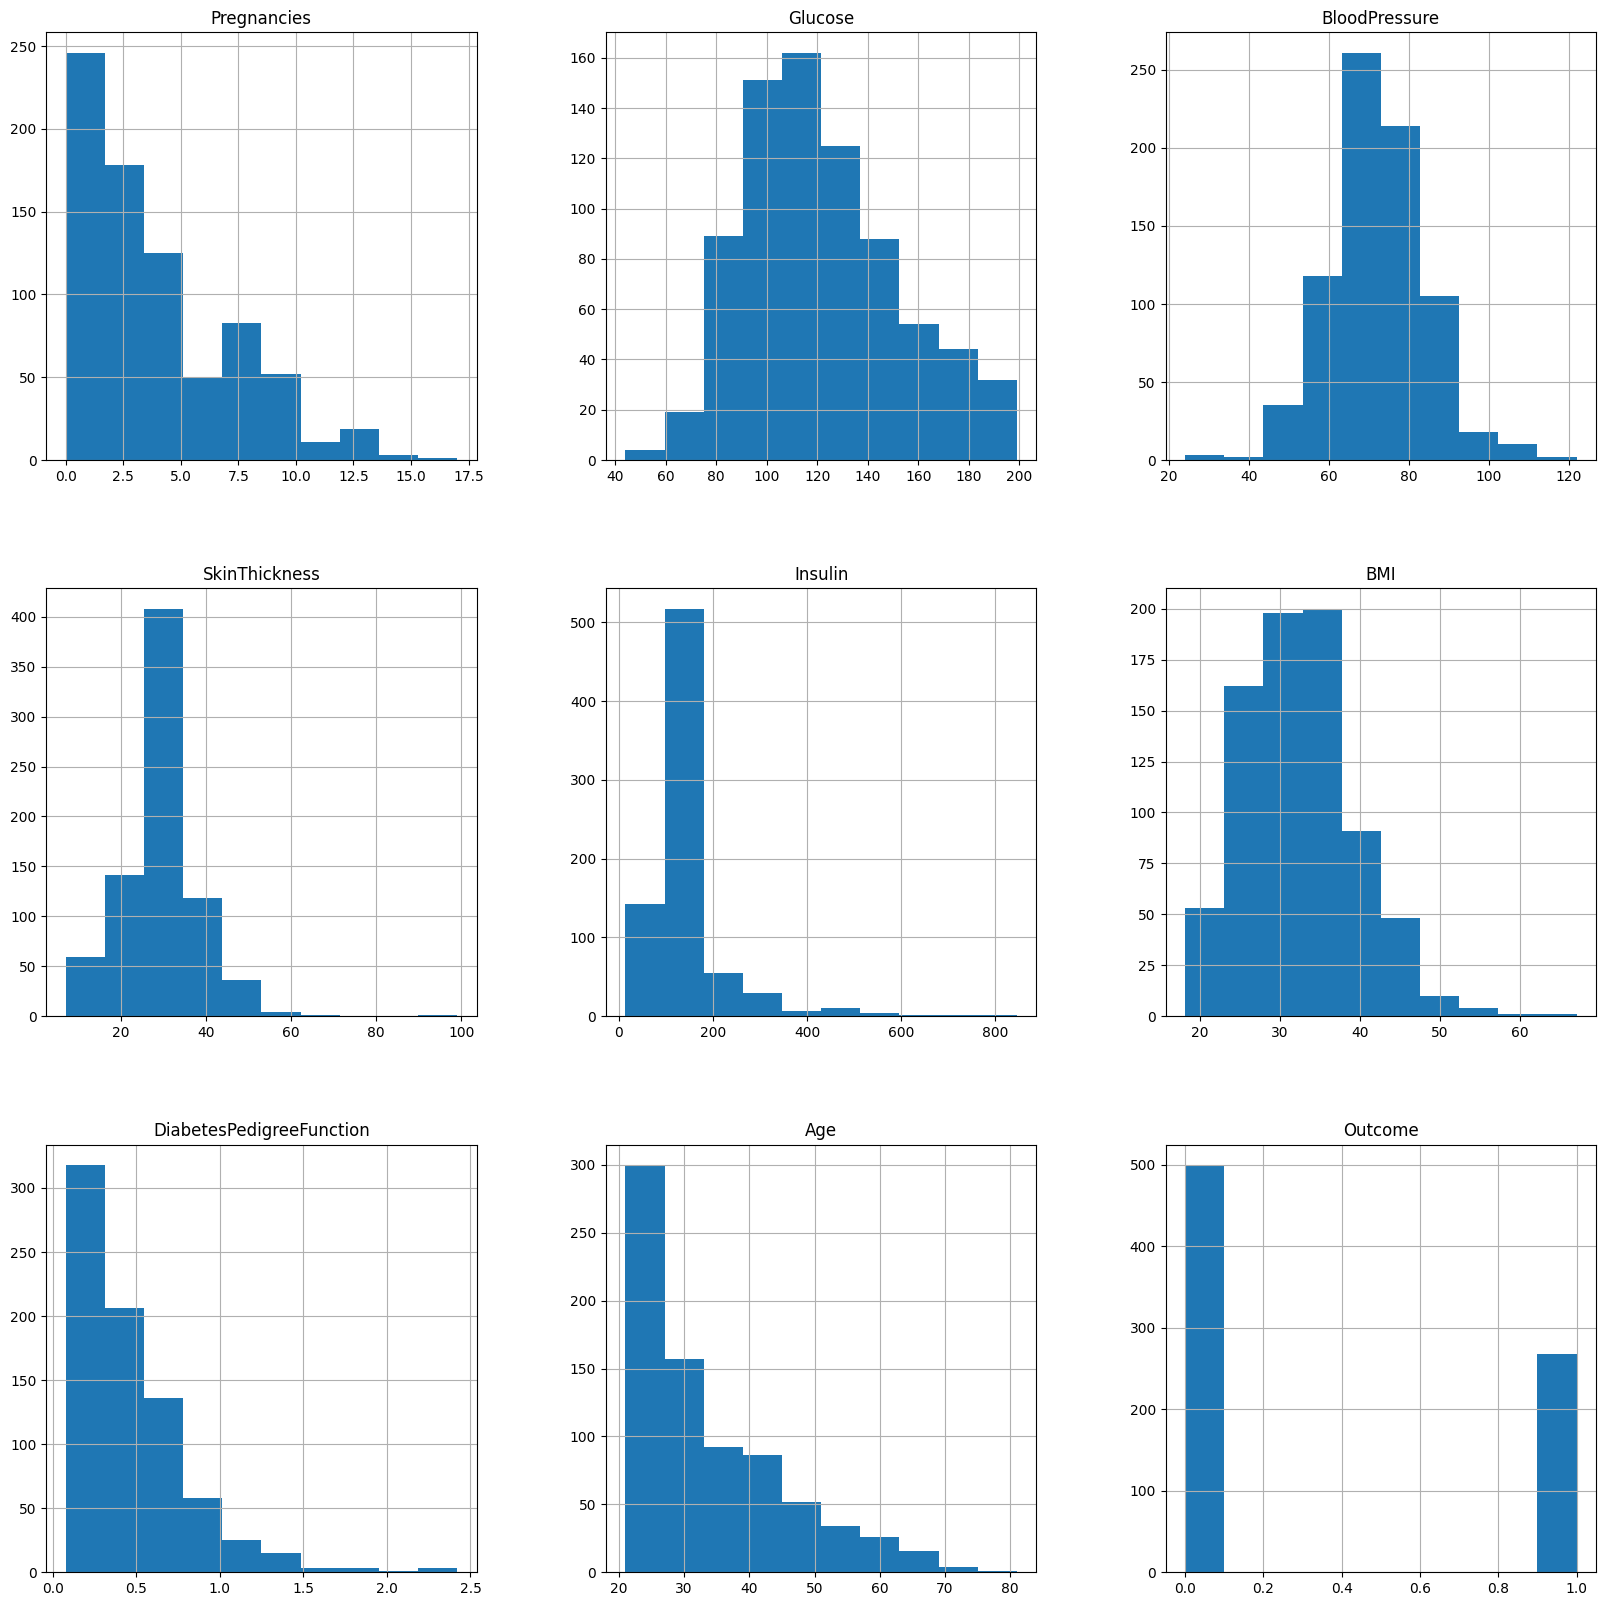

In [20]:
data_copy.hist(figsize = (20,20))

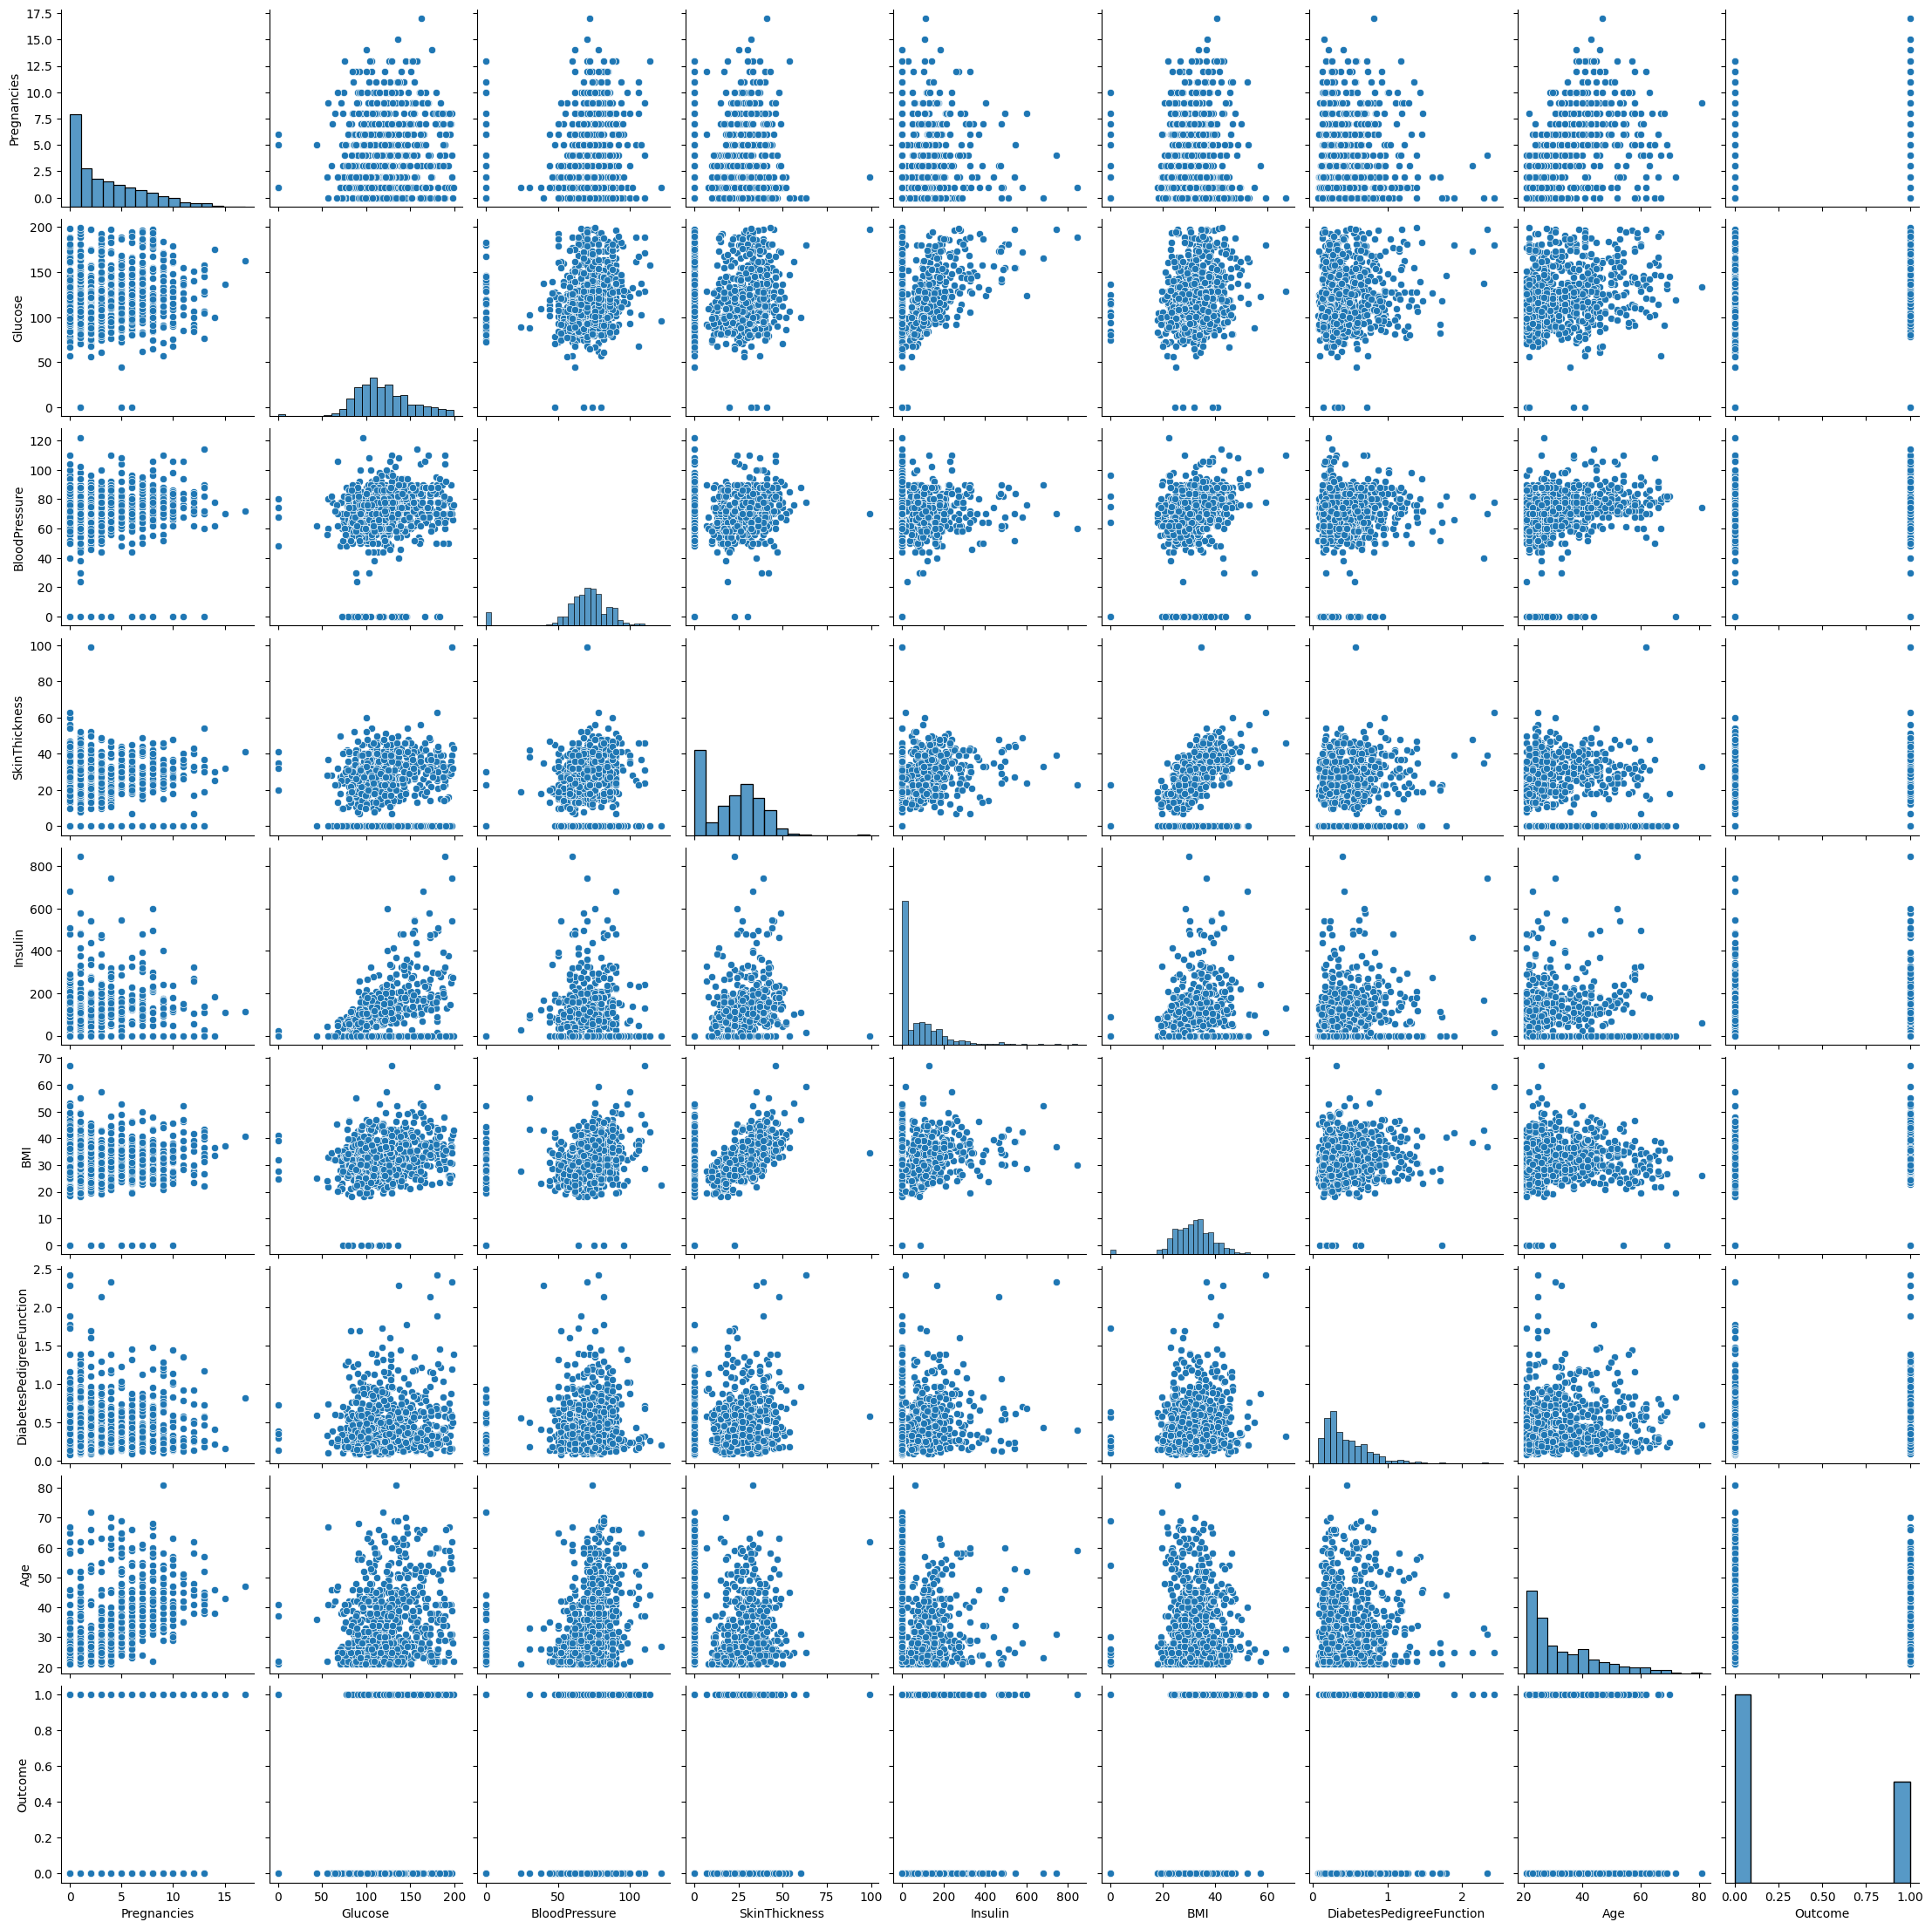

In [21]:
sns.pairplot(data)

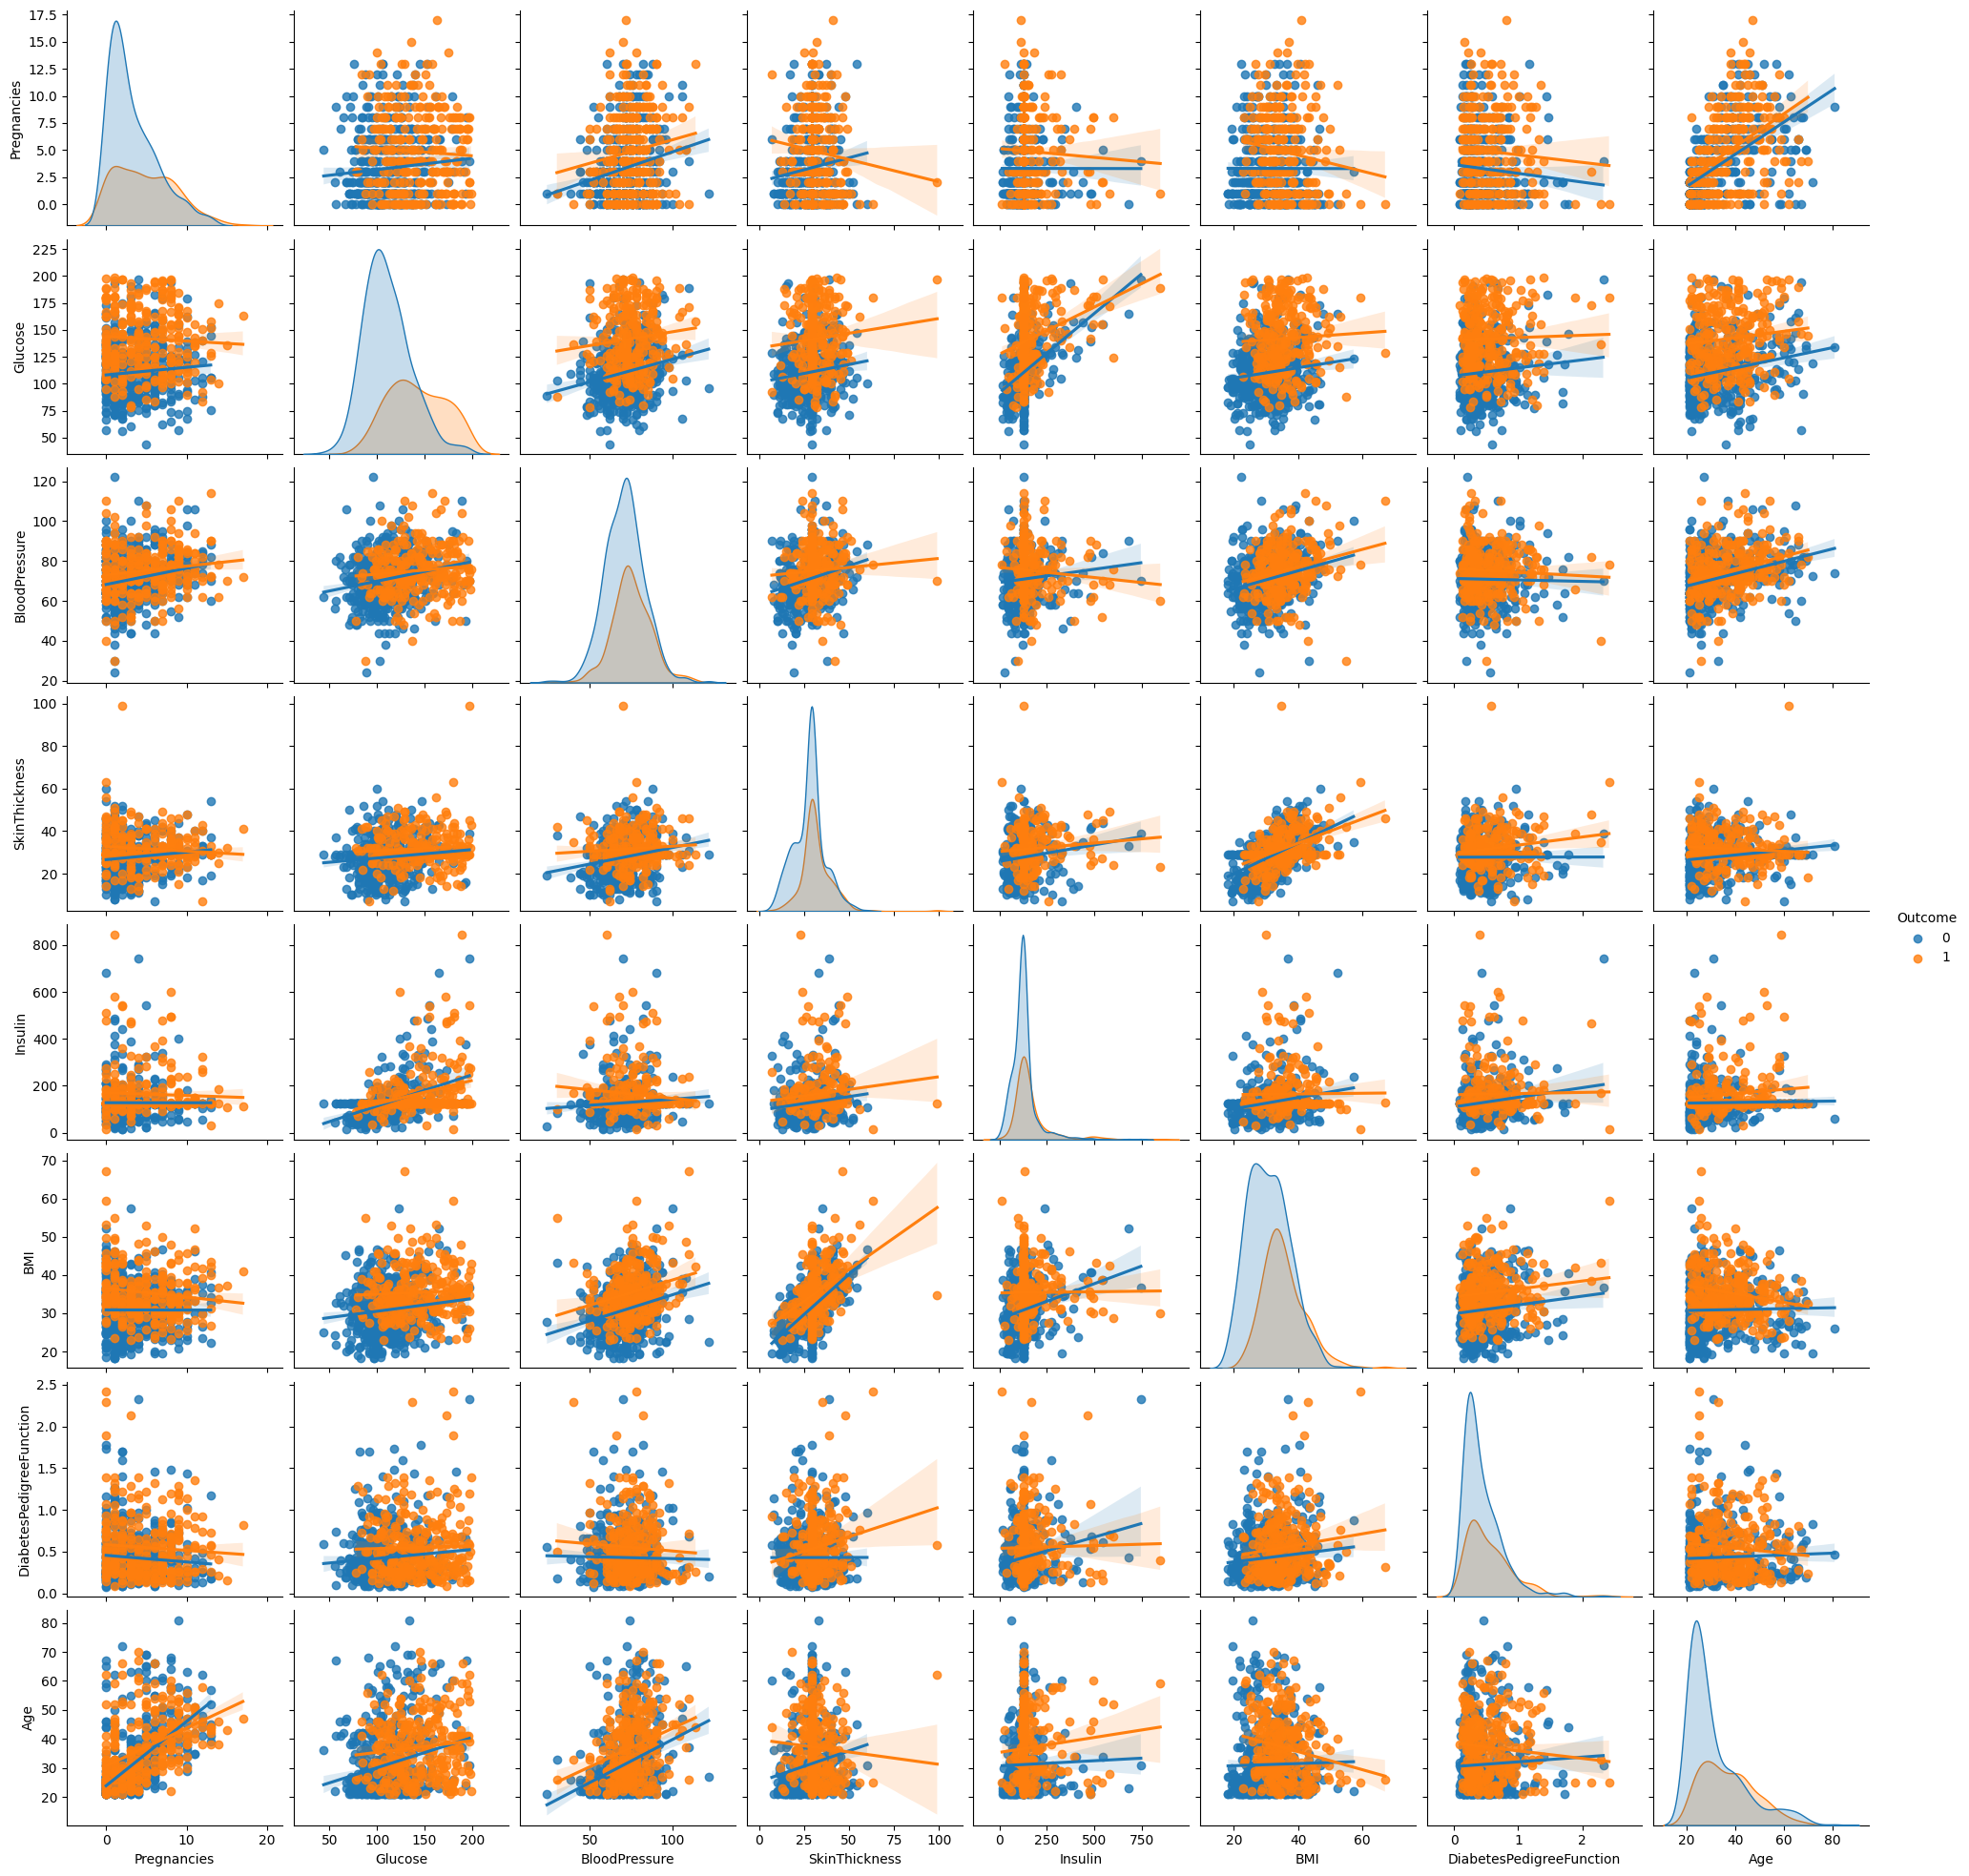

In [22]:
sns.pairplot(data=data_copy,hue='Outcome',diag_kind='kde', kind="reg")
plt.show()

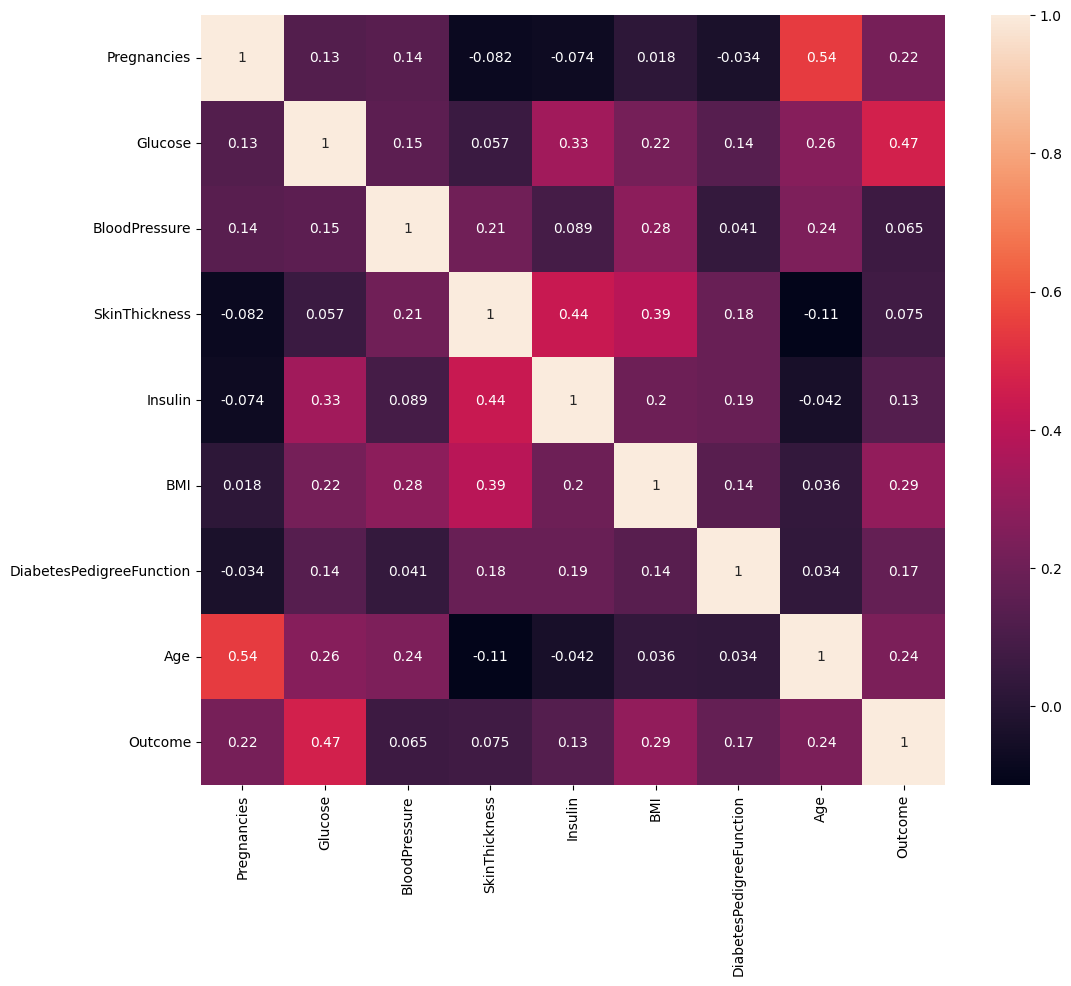

In [23]:
plt.figure(figsize=(12,10)) 
ax = sns.heatmap(data.corr(),annot = True)

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.868061,-0.033518,6.655021e-01,-0.181541,0.166964,0.468492,1.425995
1,-0.844885,-1.196747,-0.529859,-1.746338e-02,-0.181541,-0.848188,-0.365061,-0.190672
2,1.233880,2.015177,-0.695306,8.087936e-16,-0.181541,-1.326759,0.604397,-0.105584
3,-0.844885,-1.065648,-0.529859,-7.004289e-01,-0.540642,-0.630655,-0.920763,-1.041549
4,-1.141852,0.507539,-2.680669,6.655021e-01,0.316566,1.544669,5.484909,-0.020496


In [25]:
y = data_copy.Outcome

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42, stratify=y)

## Voting Classifier

* A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.<br>
* It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

In [28]:
L_R_model = LogisticRegression(solver = 'lbfgs', multi_class='multinomial',random_state=33)
R_F_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=33)
KNC_model = KNeighborsClassifier(n_neighbors=10,weights='uniform',algorithm='auto')
MLP_C_model = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000,20),learning_rate='constant',activation='relu',
                            power_t=0.4, max_iter=250)

# Voting Classifier

v_classifier_model = VotingClassifier(estimators=[('LRModel',L_R_model),('RFModel',R_F_model),('KNNModel',KNC_model),
                                                  ('NNModel',MLP_C_model)], voting= 'soft')
v_classifier_model.fit(x_train, y_train)

VotingClassifier(estimators=[('LRModel',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=33)),
                             ('RFModel',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=33)),
                             ('KNNModel', KNeighborsClassifier(n_neighbors=10)),
                             ('NNModel',
                              MLPClassifier(hidden_layer_sizes=(1000, 20),
                                            max_iter=250, power_t=0.4,
                                            solver='lbfgs'))],
                 voting='soft')

In [29]:
#Calculating Details
print('VotingClassifierModel Train Score is : ' , v_classifier_model.score(x_train, y_train))
print('VotingClassifierModel Test Score is : ' , v_classifier_model.score(x_test, y_test))
print('----------------------------------------------------')

VotingClassifierModel Train Score is :  0.93359375
VotingClassifierModel Test Score is :  0.72265625
----------------------------------------------------


## Prediction Calculation

In [30]:
y_pred = v_classifier_model.predict(x_test)
print('Predicted Value for VotingClassifierModel is : ' , y_pred[:10])

Predicted Value for VotingClassifierModel is :  [0 1 0 0 0 0 1 1 0 0]


Predictions

In [53]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

## Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label')

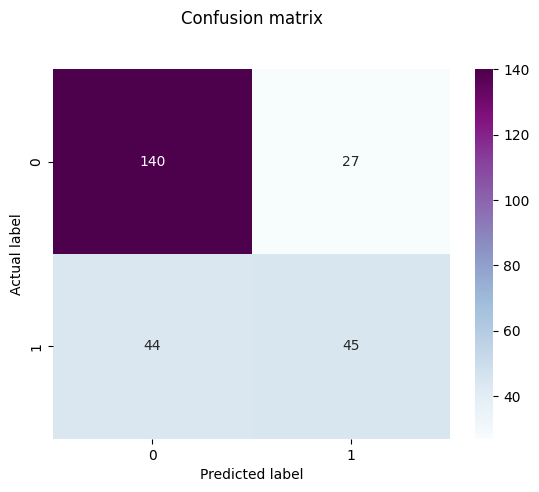

In [35]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="BuPu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Calculating Accuracy

In [37]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  185


In [40]:
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)

# Precision : measures the percentage of predictions made by the model that are correct
# Recall    : measures the percentage of relevant data points that were correctly identified by the model.
F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.72265625


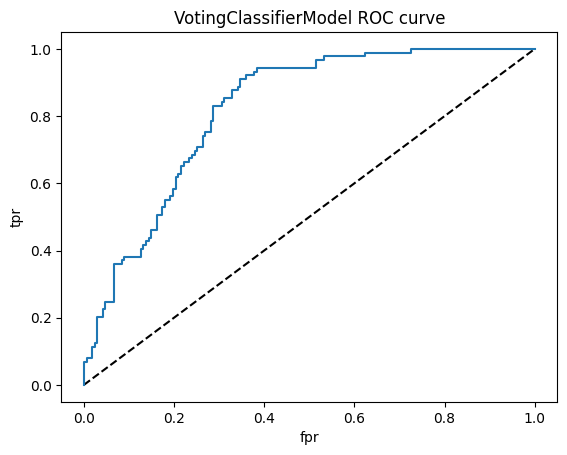

In [42]:
y_pred_proba = v_classifier_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('VotingClassifierModel ROC curve')
plt.show()